In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [34]:
data = pd.read_csv('data/Fuel.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [35]:
data = data[['ENGINESIZE', 'CO2EMISSIONS']]

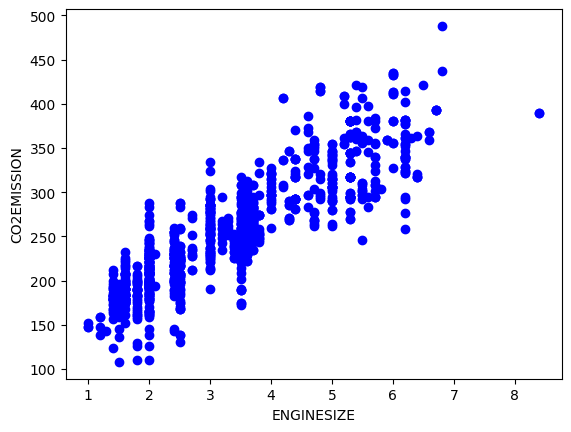

In [36]:
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

In [37]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [38]:
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('coefficent', regr.coef_)
print('intercept', regr.intercept_)

coefficent [[38.79512384]]
intercept [127.16989951]


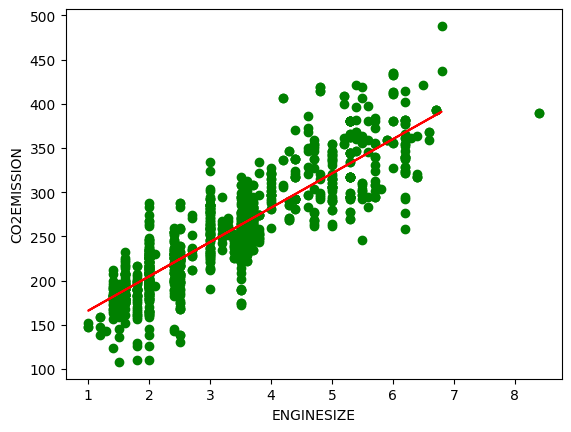

In [39]:
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='green')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

In [40]:
def get_regression_prediction(input_features, intercept, slope):
    prediction = slope * input_features + intercept
    return prediction

In [41]:
my_engine_size = 3.5
estimated_emission = get_regression_prediction(my_engine_size, regr.intercept_[0], regr.coef_[0][0])
print(estimated_emission)

262.9528329350173


In [42]:
from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [43]:
print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean squared error (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score : %.2f" % r2_score(test_y_ , test_y) ) 

Mean absolute error (MAE): 20.60
Mean squared error (MSE): 746.45
R2-score : 0.71
